## Partie 1 : PageRank - version itérative, premier exemple

##### 1. Justifier pourquoi l’algorithme de la puissance iterérée permet de calculer le score de chacune des pages.   

Concretement l'algorithme de puissance itérée calcul un vecteur associé à la plus grande valeur propre d'une matrice donnée. Ce vecteur prend compte de tous les liens entres les pages afin de leurs donner un score, ce score dépend de 2 choses : le nombre de pages qui pointe vers une autre page et le score de ses pages. Plus le score de ces pages est élévé plus elle augmentera le score des pages vers lesquelles elles pointent. 
L'algorithme répète ce calcul à l'aide d'une suite afin de determiner le score de chaque page en fonction de ses *parents*. Ainsi à chaque iteration il se rapproche d'un score fixe.

---

In [11]:
from random import randint
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import sympy as sp

In [5]:
#fonction pour la norme
def norme(X:np.array):
    sum = 0 
    for x in X:
        sum += x**2
    return np.sqrt(sum)

V = np.array([2,0,0,3])
print(norme(V))

3.605551275463989


In [7]:

def puissanceItereTP(l,A:np.array):
   """Fonction qui applique l'algorithme de puissance itérée sur une matrice. 
   Matrice de toutes tailles, stochastique ou non"""
   X = np.array([randint(1,10) for x in range (A.shape[0])])
   Lambda = 0
   while (True):
       aLambda = Lambda
       AX = np.dot(A,X) # approximation du vecteur propre associé
       Lambda = norme(AX) # approximation de lambda
       X = AX / Lambda
       if (abs(Lambda - aLambda) < l ):
           return X,Lambda


C2 = np.array([[2, 3], [1, 0]])
X, Lambda = puissanceItereTP(1e-6, C2)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C3 = np.array([[4,1,0], [1,3,1], [0,1,2]])
X, Lambda = puissanceItereTP(1e-6, C3)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C4 = np.array([[4, 1, 0, 0],[1, 3, 1, 0],[0, 1, 2, 1],[0, 0, 1, 1]])
X, Lambda = puissanceItereTP(1e-6, C4)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)

Vecteur propre approximé : [0.94868329 0.31622778]
Valeur propre approximée : 2.999999896458016
--------------------------------------
Vecteur propre approximé : [0.78846484 0.57756047 0.21153509]
Valeur propre approximée : 4.732050340698531
--------------------------------------
Vecteur propre approximé : [0.77767044 0.58002224 0.23427029 0.06261248]
Valeur propre approximée : 4.745280492328775


##### 2. Implementer cet algorithme pour calculer le score de chacune des pages du graphe precedent. On verifiera que le vecteur de score obtenu est bien approximativement solution de r = Qr.


In [34]:
def stocastique (C:np.array) -> np.array:
    """
    C : transposé de la matrice d'adjacence
    renvoi la matice stocastique de C
    """
    sum_col = C.sum(axis=0)     #somme des colonne dans un tableau
    sum_col[sum_col == 0] = 1   #si la somme vaut 0 on remplace par 1 pour eviter la division par 0 
    Q = C/sum_col               #divison de chaque valeur pas la somme de sa colonne
    return Q


1 :  1.9266320139749316
2 :  0.38532780882417134
3 :  0.5137711218625869
4 :  0.6422148242633862
5 :  0.8348804442477755
6 :  2.311873799776661
7 :  0.7706201431888298
8 :  1.5412334874999762
9 :  0.7706201431888298
10 :  1.9266320139749318
11 :  0.3853278088241714
12 :  0.513771121862587
13 :  0.6422148242633863
14 :  0.8348804442477756


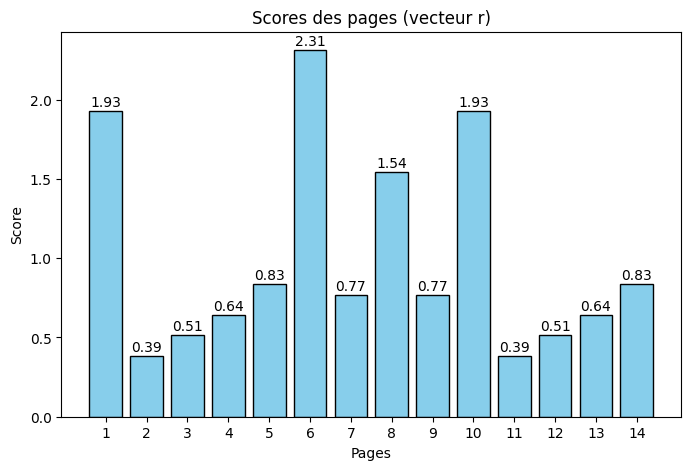

In [41]:
def Puissance_Iteree(C:np.array,precision:float) -> np.array:
    """
    C : transposé de la matrice d'adjacence
    precision : ecart limite entre deux iterations
    renvoi un vecteur qui traduit le score de chaque noeud de C
    """
    Q = stocastique(C)                                      # Calcul de la stocastique de C
    r = np.array([1 for i in range(C.shape[0])])            # Vecteur initial
    while (True):
        r_copie = r                                         
        r = np.dot(Q,r)                                     # approximation du vecteur propre associé
        if ( np.allclose(r_copie, r, atol=precision)):      # verification numerique que r = Qr
            return r
        


C = np.array([
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,1,0]
])

r = Puissance_Iteree (C,1e-6)
for i in range (len(r)):
    print (i+1,": ",r[i])

#Graphique pour la partie oral 
pages = [str(i + 1) for i in range(len(r))]

# Création du diagramme en bâtons
plt.figure(figsize=(8, 5))
bars = plt.bar(pages, r, color='skyblue', edgecolor='black')

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title("Scores des pages (vecteur r)")
plt.xlabel("Pages")
plt.ylabel("Score")
plt.show()

---

##### 3. Analyser la pertinence du resultat obtenu.
Selon mon implémentation de PageRank, la page 6 est celle avec le meilleur score, elle sera donc la mieux référencé ici par PageRank. Pour essayer de m'assurer que mes résultats sont corrects j'essaye de relever des particularités sur le graphe. Par exemple, on voit que le graphe est simétrique donc certains scores devrait avoir à la fin le même résultat(2 3 4 5 et 11 12 13 14). Et au milieu de cette simetrie il y a le point 6 qui est référencé par 1 et 10 qui sont eux même référencé par des enfants de 6, ce qui a première vue semble traduire le haut score de 6. 
*Ce resonnement n'est pas une preuve mais montre une cohérence dans les résultats obtenues.*

---

## Partie 2 : PageRank - version itérative, deuxième exemple

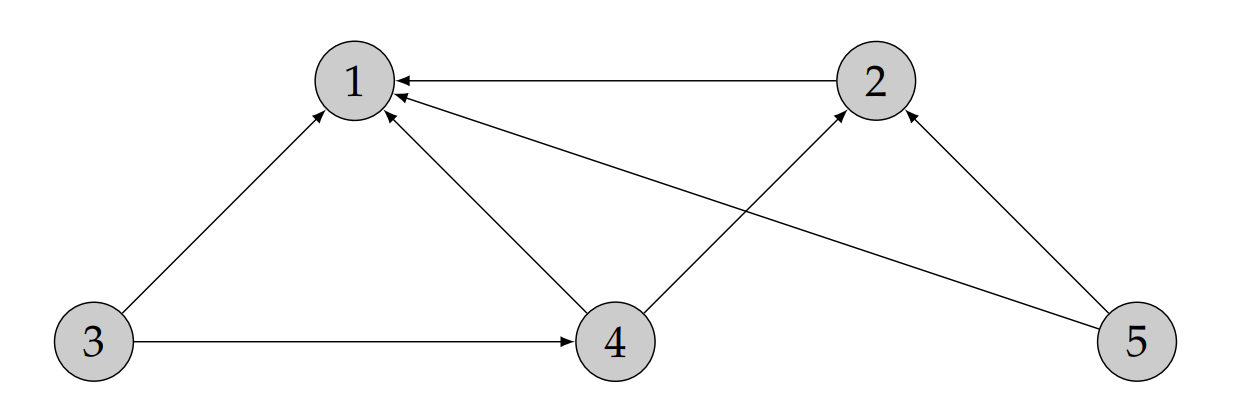

##### 1. Appliquer l’algorithme de la Partie 1 au graphe suivant et commenter le resultat obtenu


In [27]:
B = np.array([
    [0,1,1,1,1],
    [0,0,0,1,1],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0]
])

r = Puissance_Iteree(B,1e-6)
for i in range (len(r)):
    print (i+1,": ",r[i])

1 :  0.0
2 :  0.0
3 :  0.0
4 :  0.0
5 :  0.0


En appliquant ce même algorithme à ce second graphe on constate que chaque page obtient un resultât nul. Ce resultat est nul car ce graphe comporte un puit. La page 1 ne redistribue pas son score et ce cas de figure n'est pas anticipé par notre algorithme.

---   

##### 2.  En utilisant cette matrice de transition (avec α = 0, 85), calculer les scores de chacune des pages du graphe précédent. Commenter. On verifiera que le vecteur de score obtenu est bien approximativement solution de r = Pr

Le facteur d'amortissement permet de traité le cas où le graphe contient un puis. Il permet de redistribuer le score du puit en réinjectant une petite portion du score vers toutes les autres pages.

In [36]:
def matriceAmortie(C:np.array,alpha = 0.85) -> np.array:
    """ 
    C : transposé de la matrice d'adjacence
    alpha : facteur d'amortissement
    Renvoi une matrice P qui est la matrice de transition de C
    """
    Q = stocastique(C)                                                      # calcul de la stocastique de C dans Q
    sum_col = Q.sum(axis=0)                                                 # somme de chaque colonne de Q dans sum_col
    P = np.where(sum_col==0 ,1/C.shape[0],alpha * Q + (1-alpha)/C.shape[0]) # mettre la somme de toutes les colonnes à 1 meme les colonnes nuls
    return P


1 :  2.1695197166025935
2 :  1.053524336885476
3 :  0.5188194628989784
4 :  0.7393170207139755
5 :  0.5188194628989784


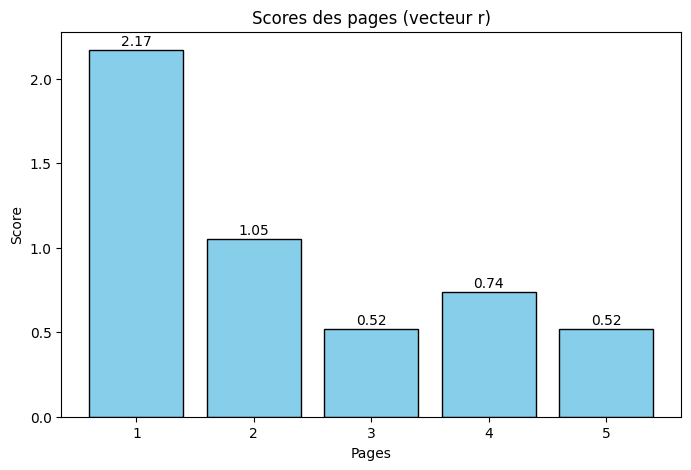

In [43]:
def PageRank_amortie(C:np.array,precision,alpha = 0.85 ) -> np.array:
    """
    C : transposé de la matrice d'adjacence
    precision : ecart limite entre deux iterations
    alpha : facteur d'amortissement
    renvoi le vecteur qui traduit le score de chacune des noeuds de C en fonction du facteur d'amortissement 
    """
    P = matriceAmortie(C,alpha)                                 # Calcul de la matrice de transition de C dans P
    r = np.array([1 for i in range(C.shape[0])])                # Vecteur initial
    while (True):
        r_copie = r
        r = np.dot(P,r)                                         # approximation du vecteur propre associe
        if ( np.allclose(r_copie, r, atol=precision)):          # test numeriquement r = Pr à precision pres 
            return r


r = PageRank_amortie (B,1e-6)
for i in range (len(r)):
    print (i+1,": ",r[i])

#Graphique pour la partie oral 
pages = [str(i + 1) for i in range(len(r))]

# Création du diagramme en bâtons
plt.figure(figsize=(8, 5))
bars = plt.bar(pages, r, color='skyblue', edgecolor='black')

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title("Scores des pages (vecteur r)")
plt.xlabel("Pages")
plt.ylabel("Score")
plt.show()


---

## Partie 3 : PageRank - version itérative, analyse

##### 1. Analyser l’influence du critere d’arrêt dans l’algorithme de la puissance iteree.

Dans l'algorithme de puissance itérée le critère d'arrêt permet de determiner à quel moment les changements entre deux derivées sont si faibles qu'ils sont négligablent. Plus le critère d'arrêt est petit plus l'algorithme sera précis sur le score des pages, le point négatif sera qu'il effectura beaucoup plus de calcul et sera plus lourd et plus long.

---

##### 2.Ajouter quelques hubs (pages qui ont beaucoup de liens sortant) et autorites (pages qui ont beaucoup de liens entrant). Commenter l’impact sur les scores


On se rend compte que si on ajoute un HUB, ici 15, qui pointe vers diverses autres noeuds mais qui n'est jamais pointé, alors son score sera très bas ce qui impact très peu les scores des autres pages. 
A l'inverse ajouter une autortié, ici 16, qui est reférencé par une très grande quantité d'autres noeuds changera les scores des pages le référencant. Chaque page qui le pointe diminu son propre score et augmente celui de 16, ils le redistribuent.     

In [44]:
C_bis = np.array([
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,1,1,0,1,0,0,0,0,0,1],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1,0,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

r = PageRank_amortie (C_bis,1e-6)
for i in range (len(r)):
    print (i+1,": ",r[i])

1 :  2.056507477319057
2 :  0.4996072230640536
3 :  0.641162915306374
4 :  0.7721020009190294
5 :  0.9948070833488765
6 :  2.027468998030773
7 :  0.7499471323616018
8 :  1.3873966003682559
9 :  0.7499471323616018
10 :  2.05046844263547
11 :  0.524080893765464
12 :  0.6470709041990412
13 :  0.7735867949838893
14 :  0.9758464013365346
15 :  0.15000000000000024


---

##### 3. Essayez d’accroître le score de certaines pages. Expliquez votre méthode et validez-la experimentalement

On a fait en sorte que chaque page soit pointée et pointe une autre page. Donc chaque page peut être accessible depuis toutes les pages. On a rajouté un lien de 6 à 10, de 6 à 1 et de 5 à 11.
6 étant la page la plus importante, elle a transmis son score aux pages 1 et 10 qui ont donc gagné en importance, au détriment de la page 6 qui en a perdu. La page 5 pointait uniquement vers la page 1 et transmet donc maintenant une partie de son importance à la page 11, tout en perdant un peu de son importance.

---

##### 4. Faites varier le facteur d’amortissement α pour analyser son influence. On rappelle que α ∈ [0, 1] 

In [48]:
t = PageRank_amortie (C,1e-6,0)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  1.0
2 :  1.0
3 :  1.0
4 :  1.0
5 :  1.0
6 :  1.0
7 :  1.0
8 :  1.0
9 :  1.0
10 :  1.0
11 :  1.0
12 :  1.0
13 :  0.9999999999999998
14 :  0.9999999999999998


In [49]:
t = PageRank_amortie (C,1e-6,1)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  1.9266320139749316
2 :  0.38532780882417134
3 :  0.5137711218625869
4 :  0.6422148242633862
5 :  0.8348804442477755
6 :  2.311873799776661
7 :  0.7706201431888298
8 :  1.5412334874999762
9 :  0.7706201431888298
10 :  1.9266320139749318
11 :  0.3853278088241714
12 :  0.513771121862587
13 :  0.6422148242633863
14 :  0.8348804442477756


Le facteur d'amortissement traduit le hasard de passer d'une page à l'autre. Plus le facteur d'amortissement est proche de 1 plus on considere que l'on peut se déplacer qu'entre deux pages ayant un lien. Alors que si le facteur d'amortiessent est 0 on considere que les liens n'ont aucunes instances sur le score de la page. 

---

## Partie 4 : PageRank - version itérative, analyse

##### 1. En utilisant le logiciel d’exploration de site web présent sur la page Ametice, construire trois matrices de votre choix et appliquez l’algorithme de PageRank à ces matrices. L’ordre de ces matrices sera compris entre 10 et 30. Ces matrices, le resultat du logiciel d’exploration ainsi que le site web choisi apparaıtront clairement dans le dossier.

Après avoir tester un grand nombre de site web, nous choisissons pour notre matrice de 10 le site de linkedin( linkedin.com ), pour notre matrice de taille 20 le site officiel d'apple ( apple.com ), et pour notre matrice de taille 30 le site de base de donnée en ligne supabase ( supabase.com ).
Pour chaque matrice que nous donne le logiciel il faudra la transposé, on se sert de la méthode .T.

sortie du logiciel :

;extern;linkedin.com;linkedin.com/legal/user-agreement?trk=linkedin-tc_auth-button_user-agreement;linkedin.com/legal/privacy-policy?trk=linkedin-tc_auth-button_privacy-policy;linkedin.com/legal/cookie-policy?trk=linkedin-tc_auth-button_cookie-policy;linkedin.com?trk=guest_homepage-basic_nav-header-logo;linkedin.com/legal/user-agreement;linkedin.com/legal/user-agreement-summary;linkedin.com/legal/privacy-policy;linkedin.com/legal/professional-community-policies;linkedin.com/legal/cookie-policy
extern;0;1;1;1;1;1;1;1;1;1;1
linkedin.com;0;0;0;0;0;0;0;0;0;0;0
linkedin.com/legal/user-agreement?trk=linkedin-tc_auth-button_user-agreement;0;1;0;0;0;1;0;0;0;0;0
linkedin.com/legal/privacy-policy?trk=linkedin-tc_auth-button_privacy-policy;0;1;0;0;0;1;0;0;0;0;0
linkedin.com/legal/cookie-policy?trk=linkedin-tc_auth-button_cookie-policy;0;1;0;0;0;1;0;0;0;0;0
linkedin.com?trk=guest_homepage-basic_nav-header-logo;0;1;0;0;0;1;0;0;0;0;0
linkedin.com/legal/user-agreement;0;0;1;1;1;0;1;1;1;0;1
linkedin.com/legal/user-agreement-summary;0;0;1;1;1;0;1;1;1;0;1
linkedin.com/legal/privacy-policy;0;0;1;1;1;0;1;1;1;0;1
linkedin.com/legal/professional-community-policies;0;0;1;1;1;0;1;1;1;0;1
linkedin.com/legal/cookie-policy;0;0;1;1;1;0;1;1;1;0;1


In [ ]:
#le logiciel fournit renvoi une matrice d'adjacence, 
#il faut donc la transposé grace à la méthode .T

linkedin10 = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0],
    [0,1,1,1,0,1,1,1,0,1],
    [0,1,1,1,0,1,1,1,0,1],
    [0,1,1,1,0,1,1,1,0,1],
    [0,1,1,1,0,1,1,1,0,1],
    [0,1,1,1,0,1,1,1,0,1]
])  
print(linkedin10.T, "\n")               # Affichage de la transposé 
t = PageRank_amortie (linkedin10.T,1e-6)   # Affichage des scores des pages 
for i in range (len(t)):
    print (i+1,": ",t[i])

[[0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1]] 

1 :  2.2352021972158713
2 :  0.7413719257015816
3 :  0.7413719257015816
4 :  0.7413719257015816
5 :  2.2352021972158713
6 :  0.7413719257015816
7 :  0.7413719257015816
8 :  0.7413719257015816
9 :  0.3399921256571879
10 :  0.7413719257015816


sortie du logiciel :

;extern;apple.com;apple.com/us/shop/goto/store;apple.com/mac;apple.com/ipad;apple.com/iphone;apple.com/watch;apple.com/apple-vision-pro;apple.com/airpods;apple.com/tv-home;apple.com/entertainment;apple.com/us/shop/goto/buy_accessories;apple.com/us/search;apple.com/us/shop/goto/bag;apple.com/apple-events;apple.com/us/shop/goto/buy_iphone;apple.com/macbook-air;apple.com/us/shop/goto/buy_mac/macbook_air;apple.com/apple-watch-series-10;apple.com/us/shop/goto/buy_watch/apple_watch_series_10;apple.com/shop/trade-in
extern;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1
apple.com;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/us/shop/goto/store;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/mac;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/ipad;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/iphone;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/watch;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/apple-vision-pro;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/airpods;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/tv-home;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/entertainment;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/us/shop/goto/buy_accessories;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/us/search;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/us/shop/goto/bag;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/apple-events;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;1;0;0
apple.com/us/shop/goto/buy_iphone;0;1;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
apple.com/macbook-air;0;1;0;1;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0
apple.com/us/shop/goto/buy_mac/macbook_air;0;1;0;1;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0
apple.com/apple-watch-series-10;0;1;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;0;0
apple.com/us/shop/goto/buy_watch/apple_watch_series_10;0;1;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;0;0
apple.com/shop/trade-in;0;1;1;0;0;0;0;0;0;0;0;1;1;1;0;1;1;1;0;1;1

In [56]:

apple20 = np.array([
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0],
    [1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1]
])


t = PageRank_amortie (apple20.T,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  2.475899164257943
2 :  0.16393442850770779
3 :  1.829154125442119
4 :  1.2604926278011963
5 :  1.3301647703397348
6 :  1.8236310955707742
7 :  1.2604926278011963
8 :  1.2604926278011963
9 :  1.2604926278011963
10 :  1.2604926278011963
11 :  0.16393442850770779
12 :  0.16393442850770779
13 :  0.16393442850770779
14 :  1.2604926278011963
15 :  0.16393442850770779
16 :  1.8430885539498267
17 :  0.16393442850770779
18 :  1.8236310955707742
19 :  0.16393442850770779
20 :  0.16393442850770779


sortie du logiciel :

;extern;supabase.com;supabase.com/enterprise;supabase.com/pricing;supabase.com/docs;supabase.com/blog;supabase.com/dashboard;supabase.com/state-of-startups;supabase.com/contact/sales;supabase.com/database;supabase.com/auth;supabase.com/edge-functions;supabase.com/storage;supabase.com/realtime;supabase.com/modules/vector;supabase.com/docs/guides/api;supabase.com/docs/guides/getting-started/quickstarts/reactjs;supabase.com/docs/guides/getting-started/quickstarts/nextjs;supabase.com/docs/guides/getting-started/quickstarts/redwoodjs;supabase.com/docs/guides/getting-started/quickstarts/flutter;supabase.com/docs/guides/getting-started/quickstarts/kotlin;supabase.com/docs/guides/getting-started/quickstarts/sveltekit;supabase.com/docs/guides/getting-started/quickstarts/solidjs;supabase.com/docs/guides/getting-started/quickstarts/vue;supabase.com/docs/guides/getting-started/quickstarts/nuxtjs;supabase.com/docs/guides/getting-started/quickstarts/refine;supabase.com/customers;supabase.com/events;supabase.com/docs/guides/examples;supabase.com/docs/guides/database/tables?queryGroups=database-method&amp;database-method=sql&amp;queryGroups=language&amp;language=js;supabase.com/docs/guides/database/tables?queryGroups=database-method&amp;database-method=sql&amp;queryGroups=language&amp;language=js?queryGroups=database-method&amp;database-method=sql&amp;queryGroups=language&amp;language=js
extern;0;1;1;1;1;1;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1
supabase.com;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/enterprise;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/pricing;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/docs;0;1;1;1;1;1;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1
supabase.com/blog;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/dashboard;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;1;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/state-of-startups;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
supabase.com/contact/sales;0;1;0;1;0;0;0;0;0;0;0;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
supabase.com/database;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/auth;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/edge-functions;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/storage;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/realtime;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/modules/vector;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/docs/guides/api;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
supabase.com/docs/guides/getting-started/quickstarts/reactjs;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/nextjs;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/redwoodjs;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/flutter;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/kotlin;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/sveltekit;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/solidjs;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/vue;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/nuxtjs;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/docs/guides/getting-started/quickstarts/refine;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;0;0;1;0;0
supabase.com/customers;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/events;0;1;1;1;0;1;0;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0
supabase.com/docs/guides/examples;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
supabase.com/docs/guides/database/tables?queryGroups=database-method&amp;database-method=sql&amp;queryGroups=language&amp;language=js;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
supabase.com/docs/guides/database/tables?queryGroups=database-method&amp;database-method=sql&amp;queryGroups=language&amp;language=js?queryGroups=database-method&amp;database-method=sql&amp;queryGroups=language&amp;language=js;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0


In [57]:
supabase30 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1], 
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],   
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
])


t = PageRank_amortie (supabase30.T,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  3.7524493344255716
2 :  1.7169309000637991
3 :  1.1674879326939362
4 :  0.5736726970869616
5 :  1.0553566569954684
6 :  0.14999999999999986
7 :  1.0553566569954684
8 :  1.0553566569954684
9 :  1.0553566569954684
10 :  1.1674879326939362
11 :  1.0553566569954684
12 :  1.1674879326939362
13 :  1.1674879326939362
14 :  1.0553566569954684
15 :  0.2901130540298034
16 :  0.5736726970869616
17 :  0.5736726970869616
18 :  0.5807560304202949
19 :  0.5736726970869616
20 :  0.5736726970869616
21 :  0.5736726970869616
22 :  0.5736726970869616
23 :  0.5736726970869616
24 :  0.5736726970869616
25 :  0.5736726970869616
26 :  2.213111582365047
27 :  1.0553566569954684
28 :  1.1674879326939362
29 :  1.1674879326939362
30 :  1.1674879326939362


Dans les trois cas la page qui obtient le plus haut score est toujours la page 1, ce qui semble logique étant donné que la page principale des sites web est celle qui renvoi vers toutes les autres, elle est la page centrale. De ce fait la quasi totalité des autres pages de ce site pointent vers la page 1 tandis que la page 1 ne les pointes pas forcément tous en retour. 

---

##### 2. Sur la page Ametice vous trouverez les matrices du réseau routier (issues de OpenStreet Map) de differentes villes. Chaque groupe étudiera la matrice “413 Avenue Gaston Berger” ainsi que la ville qui lui a été affectée.

In [72]:
def classement(noeud:np.array,score:np.array):
    """ 
    noeud : liste des noeud d'un graphe
    score : vecteur r que renvoi PageRank
    renvoi un dictionnaire avec les noeuds et leur score tries par ordre decroissant
    """
    corres = {}                                                                         # Creation du dictionnaire
    for i in range(len(noeud)):                                                         
        corres[noeud[i]] = score[i]                                                     # correspondance entre les noeuds et les valeurs
    sorted_corres = dict(sorted(corres.items(), key=lambda item: item[1],reverse=True)) # trie ordre decroissant
    return list(sorted_corres)

In [73]:
Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Matrice.npy")
Gaston_Berger = Gaston_Berger.T
id_Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Id_Noeud.npy")
score = PageRank_amortie(Gaston_Berger,1e-6)
t = classement(id_Gaston_Berger,score)

for i in range(len(t)):
    print(f"{i+1} : {t[i]} : https://www.openstreetmap.org/node/{t[i]}") 


1 : 5672603788 : https://www.openstreetmap.org/node/5672603788
2 : 9196449217 : https://www.openstreetmap.org/node/9196449217
3 : 7251343585 : https://www.openstreetmap.org/node/7251343585
4 : 33706402 : https://www.openstreetmap.org/node/33706402
5 : 1840330051 : https://www.openstreetmap.org/node/1840330051
6 : 7304213674 : https://www.openstreetmap.org/node/7304213674
7 : 1840330044 : https://www.openstreetmap.org/node/1840330044
8 : 34550845 : https://www.openstreetmap.org/node/34550845
9 : 33707108 : https://www.openstreetmap.org/node/33707108
10 : 302864793 : https://www.openstreetmap.org/node/302864793
11 : 4836722465 : https://www.openstreetmap.org/node/4836722465
12 : 304010763 : https://www.openstreetmap.org/node/304010763
13 : 5323321826 : https://www.openstreetmap.org/node/5323321826
14 : 34552857 : https://www.openstreetmap.org/node/34552857
15 : 1837997824 : https://www.openstreetmap.org/node/1837997824
16 : 12162239 : https://www.openstreetmap.org/node/12162239
17 : 3108

Pour la première donnée, nous pouvons observer devant l'IUT d'Aix-Marseille une très forte affluence. C'est un endroit accessible grâce à l'autoroute à proximité ce qui facilite l'accès en voiture. Il y a également le P+R Krypton qui se trouve assez près. C'est un lieu fréquenté par les étudiants qui justifie donc un plus grand trafic routier aux alentours.
La seconde donnée a été supprimée il y a environ deux ans ce qui est étrange étant donné qu'elle reste tout de même visible sur la carte même si le point n'est plus actif. Nous avons choisi de l'analyser malgré tout pour illustrer un autre problème. Certains liens semblent encore pris en compte dans la matrice ce qui fausse les résultats. Ce cas à quelque problème comme son rang élevé alors qu'il a été supprimé il y a deux ans nous ne sommes normalement pas capable de savoir l'accès routier. Il faudrait revoir la représentation de la fréquentation réel surtout que le point n'est plus actif il est difficile de savoir s'il était beaucoup fréquenté depuis la route.
La quatrième donnée se situe près d'une fontaine légèrement à l'écart de la route. Ce n'est pas un endroit un endroit routier fréquent cependant, il y a un parking juste à coté. Il est entouré d'un collège et d'un hotel cependant, ceci ne garantie pas un trafic routier élevé ce qui démontre que PageRank ne prend pas en compte seulement le trafic routier mais un trafic global dont les connexions entre les liens.
La donnée 1257 se situe à proximité de la Cour d'Appel et du Palais de Justice. Plusieurs commerces se trouvent dans les environs, ce qui pourrait générer du trafic routier dans la journée. Cependant, la Cour d'Appel n'est pas un lien que l'on fréquente souvent et l'accès en voiture dans ce genre d'endroit peut être compliqué. Cela est l'une des raisons pour laquelle son classement est ci bas.

Nous avons volontairement choisi quatre donnée assez différente d'entre elle pour non seulement avoir une meilleur vision global mais également, une meilleur vision de l'algorithme. Ces données démontres les limitent de PageRank pour montrer les moyens de transport utiliser. L'algorithme utilise plus précisément les liens pour trouver le plus important sans prendre forcément en compte le trafic et le nombre de personne qui se déplace à certain endroit en particulier. PageRank est très utile mais pour ce cas précis, il n'est pas très performant pour une vision global.

In [74]:
Paris = np.load("Paris, France_Matrice.npy")
Paris = Paris.T
id_Paris = np.load("Paris, France_Id_Noeud.npy")
score = score_amortie(Paris,1e-6)
t = classement(id_Paris,score)

for i in range(len(t)):
    print(f"{i} : {t[i]} : https://www.openstreetmap.org/node/{t[i]}") 

0 : 178763582 : https://www.openstreetmap.org/node/178763582
1 : 34909027 : https://www.openstreetmap.org/node/34909027
2 : 34909043 : https://www.openstreetmap.org/node/34909043
3 : 243507564 : https://www.openstreetmap.org/node/243507564
4 : 94258877 : https://www.openstreetmap.org/node/94258877
5 : 25668541 : https://www.openstreetmap.org/node/25668541
6 : 34845763 : https://www.openstreetmap.org/node/34845763
7 : 24966020 : https://www.openstreetmap.org/node/24966020
8 : 971501937 : https://www.openstreetmap.org/node/971501937
9 : 470142 : https://www.openstreetmap.org/node/470142
10 : 24984072 : https://www.openstreetmap.org/node/24984072
11 : 25580452 : https://www.openstreetmap.org/node/25580452
12 : 541421449 : https://www.openstreetmap.org/node/541421449
13 : 34845761 : https://www.openstreetmap.org/node/34845761
14 : 14798304 : https://www.openstreetmap.org/node/14798304
15 : 470153 : https://www.openstreetmap.org/node/470153
16 : 6638599300 : https://www.openstreetmap.org/no

Nous pouvons voir que le point avec le score le plus élevé est dans le boulevard Malesherbes, proche de l'Église de la Madeleine, de l'Opéra, de la Gare Saint-Lazare, de la place la Concorde et et les Champs-Élysées. Le deuxième point est dans la rue Mayran juste à côté de la rue La Fayette, abritant de nombreux commerces et restaurants. Ce ne sont pas des axes majeurs de la circulation parisienne, pourtant ils obtiennent de très bon score, on peut se demander pourquoi. Enfaite ils obtiennent de bon résultats car ils sont ou sont reliés à des points ayant beaucoup de noeuds qui point vers eux.   

Ce qu'on peut remarquer aussi bien pour la matrice de Aix que de Paris c'est que les points obtenu ne sont pas forcement les endroits les plus fréquenté de la ville. Et ce à cause de la façon dont l'algorithme PageRank a de calculer le score de chaque noeud. Ce qui serait pertinant pour le trafique routier, ce serai de determiner d'ou viennent les voitures quand elles rentrent dans la ville et quel routes sont les plus fréquenter non pas les points qui sont le mieux déservie comme le fais PageRank.  

---

## Partie 5 : PageRank - calcul direct des scores et comparaisons d’algorithmes

##### 1. On rappelle que le vecteur de score est solution du systeme r = Pr. En deduire un algorithme de calcul direct (c’est-a-dire de calcul exact et sans approximations successives) du score r. Ecrire le pseudo-code correspondant a cet algorithme


calcul_direct(A transposé matrice d'adjacence):

    I = matrice d'adjacence de N 

    d = det(A - lambda*I)

    coeff = recuperer les coeffs du polynome

    racines = resoudre le polynome
    lambda_max = racines [1]

    A = det (A - lambda_max * I)

    R = resoudre le systeme

    renvoyer R

##### 2. Implementer cet algorithme

j'ai essayé d'implementer ce code mais je n'y arrive pas sans utiliser des méthodes qui calcul tout directement et que je suppose utiliser des méthodes iteratives. je laisse quand même les tentatives afin d'en parler ou non durant la présentation oral 

In [ ]:
def calcul_direct(A:np.array):
    A = sp.Matrix(A)
    lambda_ = sp.symbols('lambda')
    I = np.eye(A.shape[0]) 
    taille = len(A)
    polynome = (A - lambda_ * I).det()
    #polynome_caracteristique = polynome.det()
    #print (polynome_caracteristique)
    coeff = sp.Poly(polynome, lambda_).all_coeffs()
    coeff = [float(coeff)for coeff in coeff]
    #print (coeff)
    #delta = coeff[1]**2 - 4 * coeff[0]*coeff[2]
    #racinesperso =((-coeff[1] + sqrt(delta)) / (2*coeff[0]) )
    racines =np.sort(np.roots(coeff))
    print(racines)
    M = np.array(A - racines[-1] * I,dtype=np.float64)
    M = M.reshape((int(sqrt(len(A))),int(sqrt(len(A)))))
    print(M)
    #M = np.array([
    #    [-1 , 1],
    #   [ 2, -2]
    #])
    #x = sp.symbols('x')
    #y = sp.symbols('y')
    #systeme = M[0][0]*x + M[0][1]*y
    #R = sp.Poly(systeme,x).all_coeffs()
    #R = abs(M[0][0]),abs(M[0][1])               # abs n'est pas satisfaisant ici
    b = np.zeros(taille)
    R = np.linalg.solve(M,np.array(b))
    return R
    

A = np.array([
    [4,1],
    [2,3]
])
B = np.array([
    [2,0],
    [0,2]
])
C = np.array([
    [0,1],
    [-2,3]
])
D = np.array([
    [1,2],
    [2,1]
])


print("coeff A",calcul_direct(A),"\n")
print("coeff B" ,calcul_direct(B),"\n")
print("coeff C" ,calcul_direct(C),"\n")
print("coeff C" ,calcul_direct(D),"\n")


##### 3. Comparer les resultats obtenus par les deux algorithmes.

Ces deux algorithmes renvoi des resultats similaires, cependant la version iterative renvoi une valeur approché alors que en calcul direct ce sont les vrais resultats 

---

##### 4. Comparer les performances des deux algorithmes. Si le temps d’execution peut-être un indicateur pertinent, ce n’est pas le seul.

La methode de calcul direct est beaucoup moins efficace pour de grande matrice. La resolution de systeme et d'equation rend l'algorithme très gourmand en performance et en mémoire. Ce qui fait qu'on obtient des résultats beaucoup plus lentement qu'avec une methode iterative.  De plus imaginons que nous traitons une matrice extremement grande, la methode iterative permet d'avoir un resultat n'importe quand ce ne sera pas forcement le plus optimal mais ca donne une premiere version de resultat. Alors que le calcul direct et tres long et nous renvoi que le resultat final, ce qui n'est pas vraiment approprié au fonctionnement rapide d'un moteur de recherche.

---

Participation :

Furkan : choix des sites partie 4 et interpretation Paris

Samuel : partie 3 q3 / interpretation Aix gaston berger

Jean-batiste : partie 3 q3 / aide sur la partie 5 q1

Evan : partie 1 / partie 2 / partie 3 : q1 q2 q4 / partie 4 : interpretation q1 / partie 5 /
